In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import os
import tensorflow as tf
import matplotlib.image as mpimg
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [23]:
path = "../cv_data/PetImages/"
os.listdir(path)

['Dog', 'Cat']

In [24]:
labels = []
file_id = []
full_names = []
lables = os.listdir(path)
for label in lables:
    img_names = os.listdir(path+ "/" +label)
    for name in img_names:
        labels.append(label)
        file_id.append(name)
        full_names.append(label + "/" + name)

full_names

['Dog/6280.jpg',
 'Dog/6497.jpg',
 'Dog/12055.jpg',
 'Dog/2808.jpg',
 'Dog/3178.jpg',
 'Dog/12029.jpg',
 'Dog/4395.jpg',
 'Dog/8720.jpg',
 'Dog/18.jpg',
 'Dog/8416.jpg',
 'Dog/6526.jpg',
 'Dog/12245.jpg',
 'Dog/5810.jpg',
 'Dog/6342.jpg',
 'Dog/1217.jpg',
 'Dog/11033.jpg',
 'Dog/11434.jpg',
 'Dog/6022.jpg',
 'Dog/123.jpg',
 'Dog/6292.jpg',
 'Dog/2669.jpg',
 'Dog/917.jpg',
 'Dog/1699.jpg',
 'Dog/8574.jpg',
 'Dog/1949.jpg',
 'Dog/10207.jpg',
 'Dog/8337.jpg',
 'Dog/12375.jpg',
 'Dog/11722.jpg',
 'Dog/2658.jpg',
 'Dog/6845.jpg',
 'Dog/3419.jpg',
 'Dog/9704.jpg',
 'Dog/9117.jpg',
 'Dog/4449.jpg',
 'Dog/306.jpg',
 'Dog/461.jpg',
 'Dog/2395.jpg',
 'Dog/10891.jpg',
 'Dog/4336.jpg',
 'Dog/11028.jpg',
 'Dog/4641.jpg',
 'Dog/9493.jpg',
 'Dog/8187.jpg',
 'Dog/1262.jpg',
 'Dog/9957.jpg',
 'Dog/7701.jpg',
 'Dog/6663.jpg',
 'Dog/8703.jpg',
 'Dog/395.jpg',
 'Dog/9613.jpg',
 'Dog/156.jpg',
 'Dog/10751.jpg',
 'Dog/4942.jpg',
 'Dog/11823.jpg',
 'Dog/15.jpg',
 'Dog/11402.jpg',
 'Dog/4788.jpg',
 'Dog/7469.

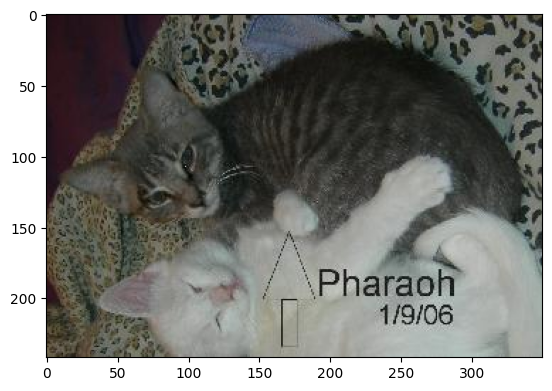

In [25]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [26]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image.shape

(270, 285, 3)

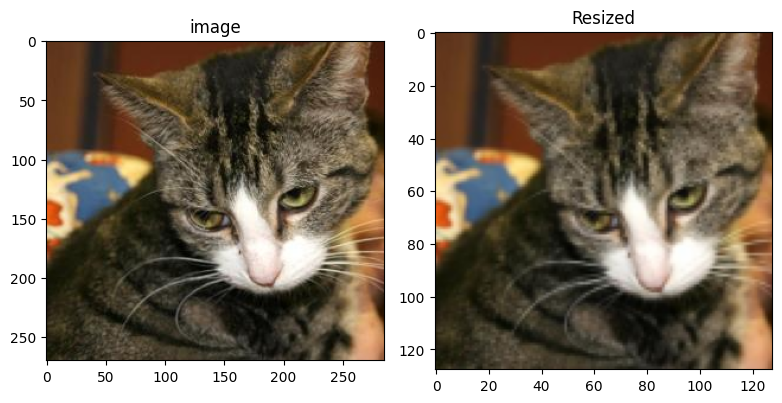

In [27]:
from skimage.transform import resize

resized = resize(image, (128, 128, 3))

fig, axes = plt.subplots(1, 2, figsize=(8,4))

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title("Resized")

fig.tight_layout()
plt.show()

In [28]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray

images = []
bar_total =tqdm(full_names)
for file in bar_total:
    try:
        image = mpimg.imread(path + file)
        images.append(resize(image, (32, 32, 3)))
    except:
        pass


images = np.array(images)

  0%|          | 0/24997 [00:00<?, ?it/s]

/home/rds/venv/opencv_venv/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:868: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [29]:
images.shape, labels[:3]

((24997, 32, 32, 3), ['Dog', 'Dog', 'Dog'])

In [30]:
images[:3]

array([[[[0.88671826, 0.83321231, 0.83515133],
         [0.8788195 , 0.81989296, 0.82452874],
         [0.86707655, 0.80820786, 0.81575196],
         ...,
         [0.286548  , 0.34316806, 0.19335599],
         [0.30649483, 0.3467501 , 0.19464757],
         [0.34856657, 0.39177483, 0.21447027]],

        [[0.88229571, 0.8302353 , 0.83375928],
         [0.83910961, 0.78471643, 0.80062536],
         [0.85014332, 0.79734919, 0.80767963],
         ...,
         [0.32110994, 0.32434829, 0.22575849],
         [0.30082678, 0.32258136, 0.20536629],
         [0.28492724, 0.30522847, 0.17891105]],

        [[0.88961652, 0.83301002, 0.83597435],
         [0.81888732, 0.76094691, 0.77640479],
         [0.81409366, 0.75938347, 0.78333752],
         ...,
         [0.47060256, 0.41950581, 0.3247075 ],
         [0.39803111, 0.35737669, 0.27869592],
         [0.36497034, 0.32971684, 0.25500877]],

        ...,

        [[0.48504082, 0.38368321, 0.29918978],
         [0.48274581, 0.39011204, 0.29167905]

In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([1, 1, 1]), array(['Cat', 'Dog'], dtype='<U3'))

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2,
                                                    random_state=13, stratify=labels_encoded)
X_train.shape, X_test.shape

((19997, 32, 32, 3), (5000, 32, 32, 3))

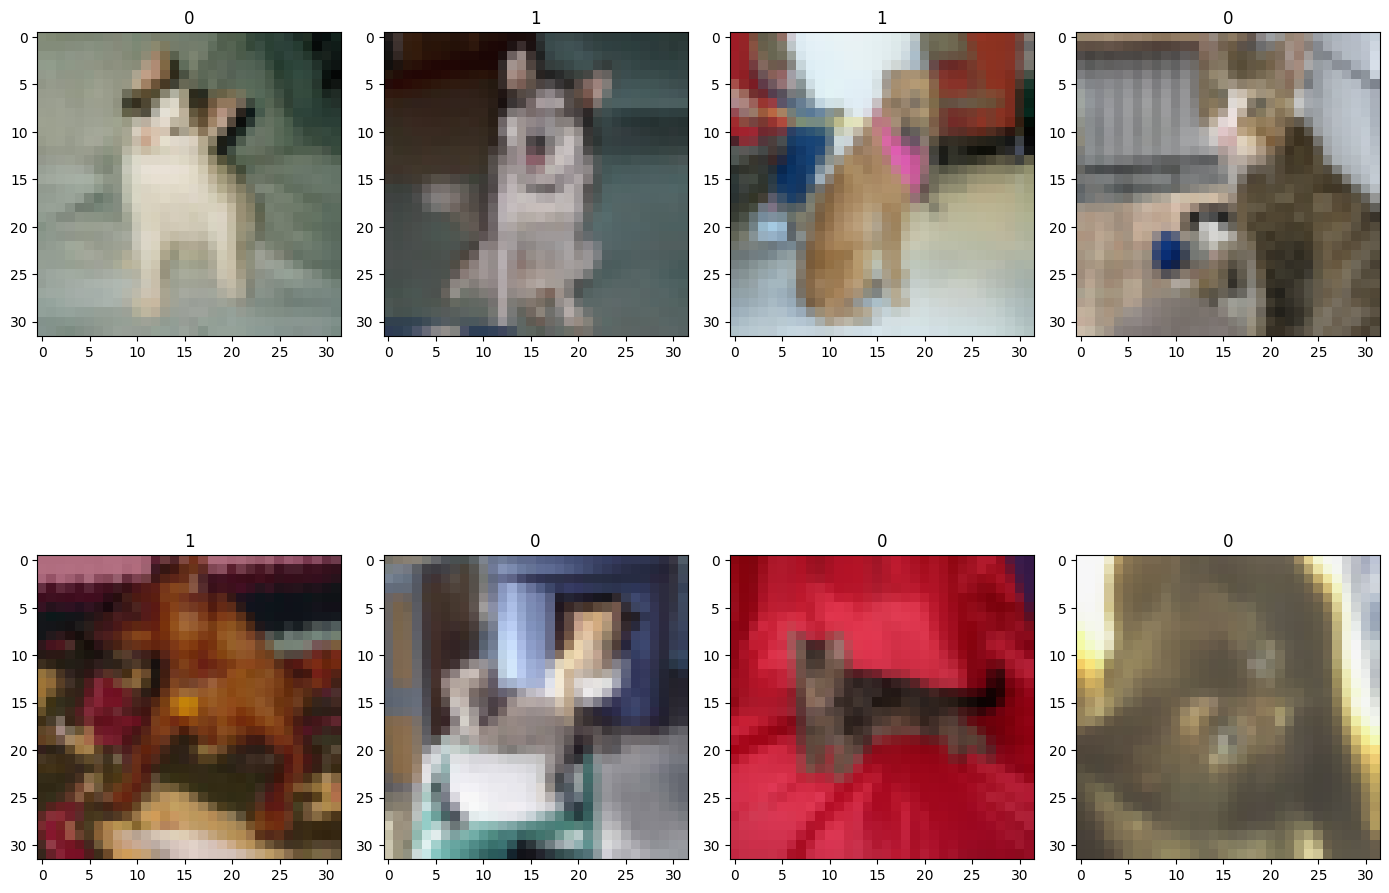

In [33]:
sample = random.choices(population=range(0, 19997), k = 8)

plt.figure(figsize=(14,12))

for idx, n in enumerate(sample):
    plt.subplot(2,4,idx+1)
    plt.imshow(X_train[n], cmap="Greys",
               interpolation="nearest")
    plt.title(y_train[n])

plt.tight_layout()
plt.show()

In [34]:
from tensorflow.keras import layers, models

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 64)         

In [35]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])



In [36]:
hist = model.fit(X_train.reshape(19997, 32, 32, 3), y_train,
                 epochs=20, verbose=1,
                 validation_data = (X_test.reshape(5000, 32, 32, 3), y_test))

Epoch 1/20


2024-02-27 13:17:38.478752: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 [==============================] - 5s 5ms/step - loss: 0.6617 - accuracy: 0.5851 - val_loss: 0.6024 - val_accuracy: 0.6954
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 0.5876 - accuracy: 0.6898 - val_loss: 0.5429 - val_accuracy: 0.7276
Epoch 3/20
625/625 [==============================] - 3s 4ms/step - loss: 0.5544 - accuracy: 0.7110 - val_loss: 0.5227 - val_accuracy: 0.7372
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.5300 - accuracy: 0.7332 - val_loss: 0.4947 - val_accuracy: 0.7614
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.5059 - accuracy: 0.7499 - val_loss: 0.4761 - val_accuracy: 0.7858
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.4909 - accuracy: 0.7602 - val_loss: 0.4631 - val_accuracy: 0.7802
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.4766 - accuracy: 0.7700 - val_loss: 0.4575 - val_accuracy: 0.7878
Epoch 8/20
625/62

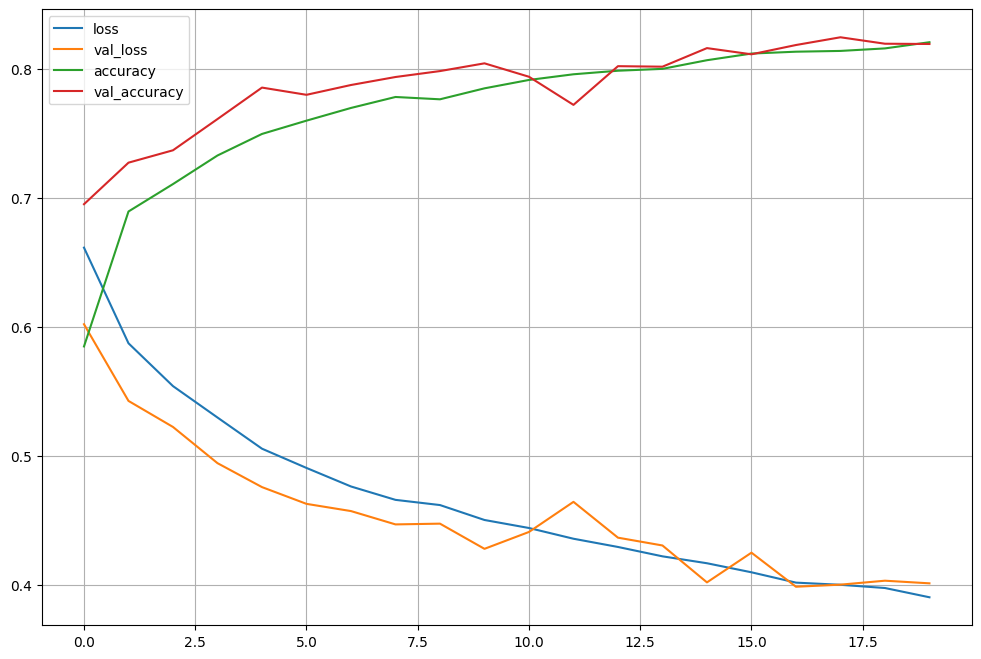

In [37]:
plot_target = ["loss", "val_loss", "accuracy", "val_accuracy"]
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [39]:
hist.history[each]

[0.6953999996185303,
 0.7275999784469604,
 0.7372000217437744,
 0.7613999843597412,
 0.7857999801635742,
 0.7802000045776367,
 0.7878000140190125,
 0.7940000295639038,
 0.7986000180244446,
 0.8046000003814697,
 0.7942000031471252,
 0.7724000215530396,
 0.8023999929428101,
 0.8019999861717224,
 0.8163999915122986,
 0.8116000294685364,
 0.8187999725341797,
 0.8248000144958496,
 0.8198000192642212,
 0.819599986076355]